In [2]:
import pandas as pd
import numpy as np

In [3]:
print("Exploring Real GDP:\n")

rgdp_filename="/home/danielj/insight/project/data/BEA-GDP_MetroArea/gmpRGDP.csv"

rgdp_df = pd.read_csv(rgdp_filename,low_memory=False)

print rgdp_df.head(5)

print("printing column names:\n")

column_names = rgdp_df.columns.values.tolist()
print(column_names)

msa_df = rgdp_df["GeoName"].unique()

print("Number of unique Metropolitian Statistical Areas: %d\n"%len(msa_df))

print msa_df

rgdp_totals_df = rgdp_df[rgdp_df['Description']=='All industry total']
totals_values_df = rgdp_totals_df[rgdp_totals_df.columns[8:21]].astype(int)
msa = rgdp_totals_df['GeoName']

is_nan_array = totals_values_df.isnull().sum()
print(is_nan_array)

#values_are_finite = rgdp_df[]

Exploring Real GDP:

  GeoFIPS                               GeoName  Region  ComponentId  \
0   00998  United States (Metropolitan Portion)     NaN          900   
1   00998  United States (Metropolitan Portion)     NaN          900   
2   00998  United States (Metropolitan Portion)     NaN          900   
3   00998  United States (Metropolitan Portion)     NaN          900   
4   00998  United States (Metropolitan Portion)     NaN          900   

                   ComponentName  IndustryId IndustryClassification  \
0  Real GDP by Metropolitan Area           1                    ...   
1  Real GDP by Metropolitan Area           2                    ...   
2  Real GDP by Metropolitan Area           3                     11   
3  Real GDP by Metropolitan Area           4                111-112   
4  Real GDP by Metropolitan Area           5                113-115   

                                     Description      2001      2002  \
0                             All industry tota

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

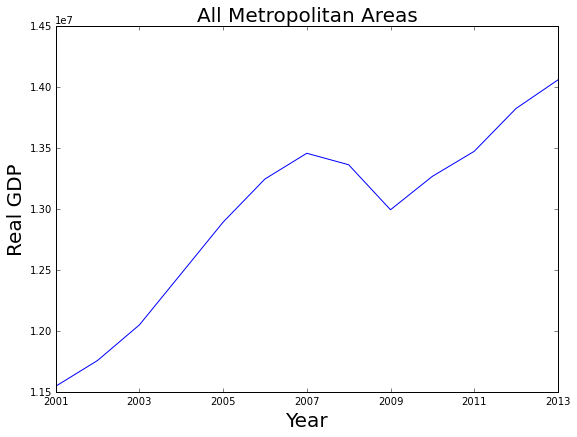

In [4]:
fig = plt.figure(figsize = (9,7))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('All Metropolitan Areas', fontsize=20)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Real GDP', fontsize=20)

totals_values_df.iloc[0].plot()

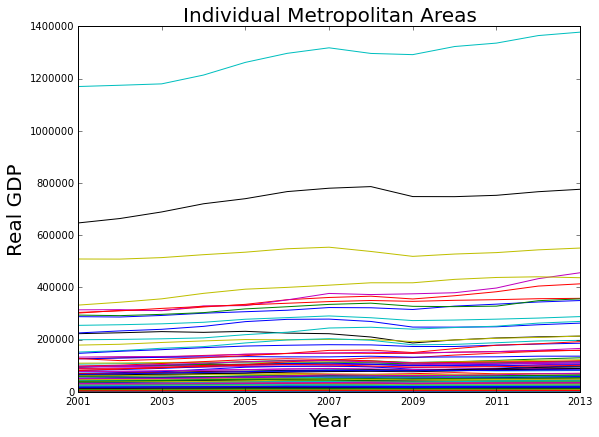

In [5]:
fig = plt.figure(figsize = (9,7))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Individual Metropolitan Areas', fontsize=20)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Real GDP', fontsize=20)
for i in range(1,len(totals_values_df)):
    totals_values_df.iloc[i].plot()

In [35]:
temp_df = totals_values_df.ix[1:]

averages = temp_df.sum(axis=0)/len(temp_df)

for ind in averages.index:
    temp_df[ind] = temp_df[ind] - averages[ind]

msa_part = msa.ix[1:]
temp_df['region']=msa_part
print temp_df.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             2001          2002          2003          2004          2005  \
87  -25722.587927 -26130.674541 -26796.787402 -27823.776903 -28945.847769   
174  -3744.587927  -3376.674541  -3398.787402  -3644.776903  -4020.847769   
261 -25038.587927 -25657.674541 -26339.787402 -27450.776903 -28470.847769   
348 -27516.587927 -27953.674541 -28771.787402 -29642.776903 -30715.847769   
435   7861.412073   7686.325459   8247.212598   8414.223097   7519.152231   

            2006          2007          2008          2009          2010  \
87  -29666.07874 -29988.572178 -29597.060367 -28867.677165 -29555.367454   
174  -5018.07874  -5637.572178  -5468.060367  -6345.677165  -6389.367454   
261 -29539.07874 -30208.572178 -30171.060367 -29149.677165 -29959.367454   
348 -31490.07874 -32187.572178 -31935.060367 -31042.677165 -31853.367454   
435   6987.92126   5844.427822   6389.939633   8347.322835   7642.632546   

             2011          2012          2013  \
87  -29940.047244 -30510.871391

In [10]:
from sqlalchemy import create_engine

engine = create_engine(
            "mysql+mysqldb://danielj:@localhost/results_draft")

In [12]:
temp_df.to_sql(con=engine, name='norm_gdp_per_msa_all_industry',
                  if_exists='replace', flavor='mysql')

In [28]:
sql_query = 'SELECT gdp.2001, gdp.2002, gdp.2003, gdp.2004, gdp.2005, '\
                    'gdp.2006, gdp.2007, gdp.2008, gdp.2009, gdp.2010, '\
                    'gdp.2011, gdp.2012, gdp.2013, region '\
                    'FROM norm_gdp_per_msa_all_industry gdp '\
                    #'WHERE region LIKE \'%%abilene%%\';'
read_df = pd.read_sql(sql_query, con=engine)

print read_df

          2001       2002       2003       2004       2005       2006  \
0     0.151898   0.154092   0.153495   0.150724   0.145405   0.147406   
1     0.876537   0.890690   0.892633   0.888749   0.881289   0.855782   
2     0.174450   0.169404   0.167931   0.162110   0.159429   0.151056   
3     0.092748   0.095077   0.091105   0.095202   0.093148   0.094985   
4     1.259199   1.248823   1.260528   1.256830   1.221995   1.200831   
5     1.083002   1.061485   1.104253   1.174509   1.133039   1.111766   
6     0.140918   0.142826   0.140891   0.144956   0.145110   0.151200   
7     0.971625   0.974275   0.933858   0.910665   0.901158   0.893316   
8     0.134061   0.131140   0.131224   0.128748   0.127396   0.124702   
9     0.268022   0.269661   0.270472   0.267751   0.261907   0.268228   
10    0.112201   0.111101   0.114797   0.116050   0.113313   0.119126   
11    0.655235   0.667418   0.648602   0.657321   0.658324   0.665353   
12    0.612966   0.640355   0.638967   0.613489   0

(-0.5, 0.5)

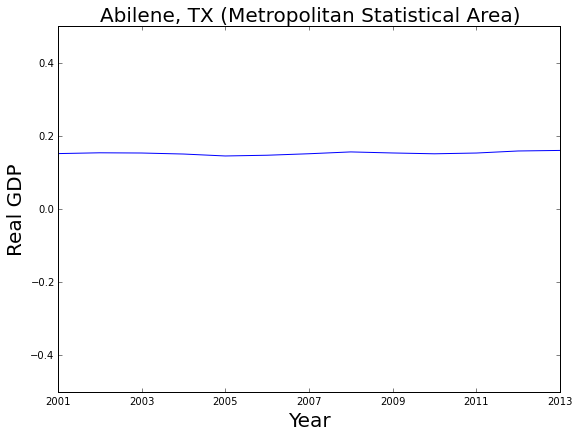

In [30]:
fig = plt.figure(figsize = (9,7))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(read_df.ix[0,'region'], fontsize=20)

plot_df = read_df.drop('region',1)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Real GDP', fontsize=20)

plot_df.iloc[0].plot()

plt.ylim(-.5,.5)

(0, 20)

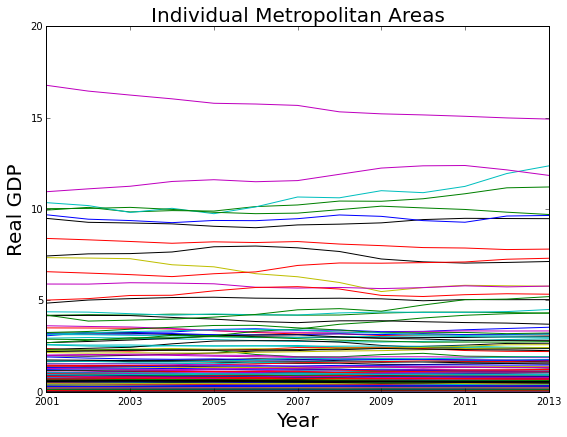

In [37]:
fig = plt.figure(figsize = (9,7))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Individual Metropolitan Areas', fontsize=20)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Real GDP', fontsize=20)
for i in range(1,len(read_df)):
    read_df.drop('region',1).iloc[i].plot()
    
plt.ylim(0,20)